In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## health care growth no short

In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/healthcare_growth_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009364,0.00,0.3766,0.4595,0.1539,0.0001,0.0079,0.0019,0.0000,0.0000,0.0000,0.0000
2,0.009120,0.01,0.3749,0.4221,0.1366,0.0001,0.0561,0.0102,0.0000,0.0000,0.0000,0.0000
3,0.008936,0.02,0.3704,0.3893,0.1240,0.0160,0.0850,0.0150,0.0000,0.0001,0.0000,0.0001
4,0.008783,0.03,0.3630,0.3615,0.1168,0.0507,0.0931,0.0146,0.0000,0.0000,0.0000,0.0001
5,0.008655,0.04,0.3560,0.3338,0.1097,0.0847,0.1001,0.0142,0.0000,0.0000,0.0000,0.0013
6,0.008554,0.05,0.3503,0.3059,0.1026,0.1163,0.1043,0.0136,0.0000,0.0000,0.0001,0.0067
7,0.008475,0.06,0.3455,0.2808,0.0963,0.1406,0.1061,0.0135,0.0000,0.0000,0.0036,0.0135
8,0.008409,0.07,0.3405,0.2633,0.0919,0.1502,0.1068,0.0148,0.0000,0.0000,0.0160,0.0163
9,0.008353,0.08,0.3356,0.2464,0.0876,0.1589,0.1075,0.0161,0.0000,0.0000,0.0289,0.0189


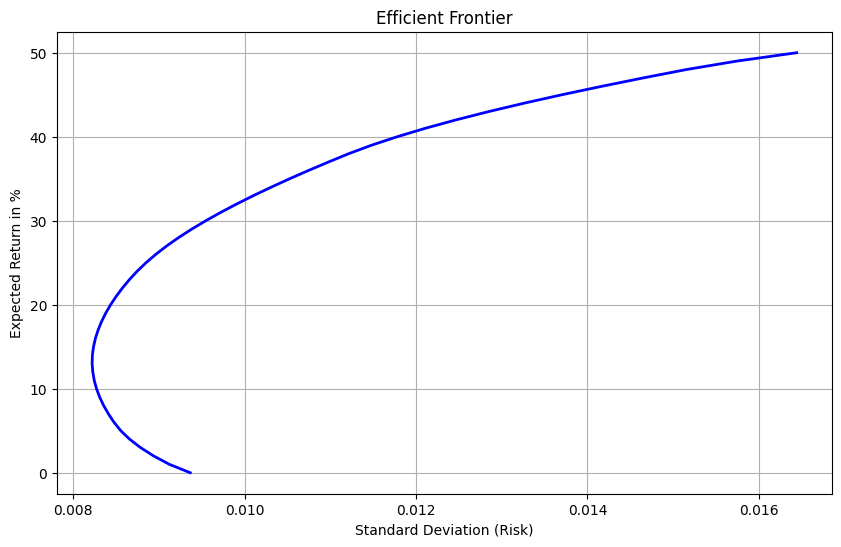

In [3]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


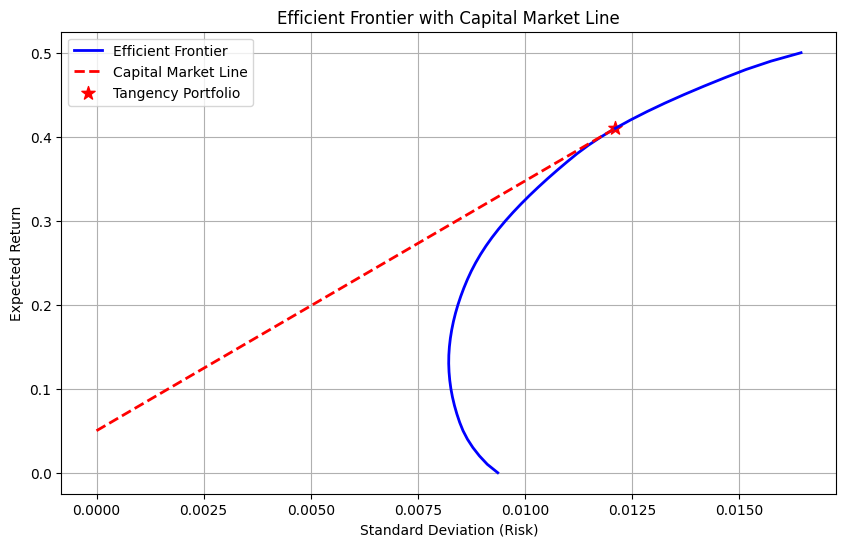

In [4]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
tangency_portfolio 

SDp             0.012106
ERp             0.410000
x1              0.000000
x2              0.000000
x3              0.000000
x4              0.256600
x5              0.000000
x6              0.016200
x7              0.195300
x8              0.007800
x9              0.523300
x10             0.000800
SharpeRatio    29.736331
Name: 42, dtype: float64

## Consumption growth short


In [6]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/healthcare_growth_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008867,0.00,0.3618,0.3574,0.1253,0.1437,0.1566,0.0331,-0.0651,-0.0846,-0.0429,0.0147
2,0.008766,0.01,0.3576,0.3418,0.1208,0.1504,0.1544,0.0334,-0.0597,-0.0830,-0.0318,0.0161
3,0.008672,0.02,0.3535,0.3262,0.1163,0.1571,0.1523,0.0336,-0.0543,-0.0815,-0.0208,0.0176
4,0.008586,0.03,0.3493,0.3106,0.1117,0.1639,0.1502,0.0339,-0.0490,-0.0799,-0.0097,0.0190
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.018925,0.76,0.0460,-0.8304,-0.2187,0.6542,-0.0067,0.0546,0.3426,0.0351,0.7975,0.1258
78,0.019168,0.77,0.0418,-0.8460,-0.2233,0.6610,-0.0088,0.0549,0.3479,0.0367,0.8086,0.1272
79,0.019413,0.78,0.0377,-0.8617,-0.2278,0.6677,-0.0110,0.0552,0.3533,0.0383,0.8196,0.1287
80,0.019658,0.79,0.0335,-0.8773,-0.2323,0.6744,-0.0131,0.0555,0.3587,0.0398,0.8307,0.1302


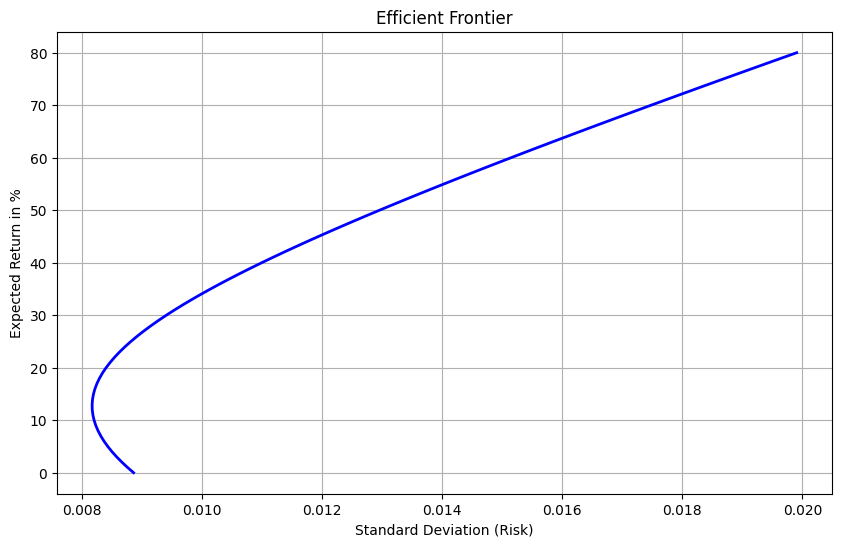

In [7]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


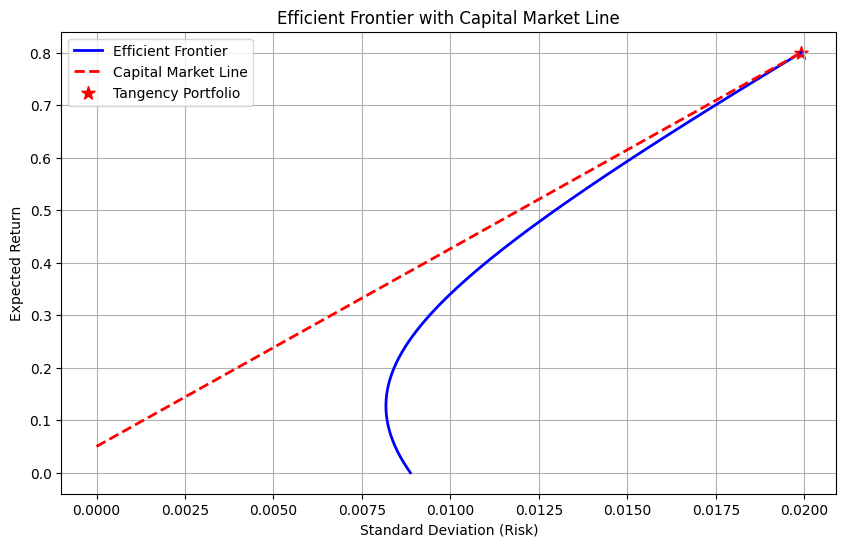

In [8]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
tangency_portfolio

SDp             0.019903
ERp             0.800000
x1              0.029400
x2             -0.892900
x3             -0.236800
x4              0.681100
x5             -0.015300
x6              0.055700
x7              0.364000
x8              0.041400
x9              0.841700
x10             0.131600
SharpeRatio    37.682250
Name: 81, dtype: float64

In [10]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008867,0.00,0.3618,0.3574,0.1253,0.1437,0.1566,0.0331,-0.0651,-0.0846,-0.0429,0.0147,-5.638983
2,0.008766,0.01,0.3576,0.3418,0.1208,0.1504,0.1544,0.0334,-0.0597,-0.0830,-0.0318,0.0161,-4.563079
3,0.008672,0.02,0.3535,0.3262,0.1163,0.1571,0.1523,0.0336,-0.0543,-0.0815,-0.0208,0.0176,-3.459253
4,0.008586,0.03,0.3493,0.3106,0.1117,0.1639,0.1502,0.0339,-0.0490,-0.0799,-0.0097,0.0190,-2.329311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.018925,0.76,0.0460,-0.8304,-0.2187,0.6542,-0.0067,0.0546,0.3426,0.0351,0.7975,0.1258,37.516856
78,0.019168,0.77,0.0418,-0.8460,-0.2233,0.6610,-0.0088,0.0549,0.3479,0.0367,0.8086,0.1272,37.561767
79,0.019413,0.78,0.0377,-0.8617,-0.2278,0.6677,-0.0110,0.0552,0.3533,0.0383,0.8196,0.1287,37.604214
80,0.019658,0.79,0.0335,-0.8773,-0.2323,0.6744,-0.0131,0.0555,0.3587,0.0398,0.8307,0.1302,37.644332
